<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#添加滤波器" data-toc-modified-id="添加滤波器-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>添加滤波器</a></span><ul class="toc-item"><li><span><a href="#使用Torch进行实现多种滤波器" data-toc-modified-id="使用Torch进行实现多种滤波器-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>使用Torch进行实现多种滤波器</a></span></li></ul></li><li><span><a href="#Cifar10-classification" data-toc-modified-id="Cifar10-classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cifar10 classification</a></span><ul class="toc-item"><li><span><a href="#PyTorch-Basic-Implementation" data-toc-modified-id="PyTorch-Basic-Implementation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PyTorch Basic Implementation</a></span><ul class="toc-item"><li><span><a href="#导入环境" data-toc-modified-id="导入环境-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>导入环境</a></span></li><li><span><a href="#加载数据" data-toc-modified-id="加载数据-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>加载数据</a></span></li><li><span><a href="#数据显示" data-toc-modified-id="数据显示-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>数据显示</a></span></li><li><span><a href="#构建网络" data-toc-modified-id="构建网络-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>构建网络</a></span></li><li><span><a href="#定义Loss以及optimizer" data-toc-modified-id="定义Loss以及optimizer-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>定义Loss以及optimizer</a></span></li><li><span><a href="#开始训练" data-toc-modified-id="开始训练-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>开始训练</a></span></li><li><span><a href="#网络保存与重载" data-toc-modified-id="网络保存与重载-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>网络保存与重载</a></span></li><li><span><a href="#效果验证" data-toc-modified-id="效果验证-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>效果验证</a></span></li><li><span><a href="#混淆矩阵可视化" data-toc-modified-id="混淆矩阵可视化-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>混淆矩阵可视化</a></span></li></ul></li><li><span><a href="#PyTorch-Implementation-with-validation" data-toc-modified-id="PyTorch-Implementation-with-validation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>PyTorch Implementation with validation</a></span><ul class="toc-item"><li><span><a href="#相关函数定义" data-toc-modified-id="相关函数定义-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>相关函数定义</a></span></li><li><span><a href="#划分验证集" data-toc-modified-id="划分验证集-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>划分验证集</a></span></li><li><span><a href="#构建网络" data-toc-modified-id="构建网络-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>构建网络</a></span></li><li><span><a href="#开始训练" data-toc-modified-id="开始训练-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>开始训练</a></span></li><li><span><a href="#调大batch重新训练" data-toc-modified-id="调大batch重新训练-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>调大batch重新训练</a></span></li></ul></li><li><span><a href="#Fastai-Implementation" data-toc-modified-id="Fastai-Implementation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fastai Implementation</a></span><ul class="toc-item"><li><span><a href="#官方教程" data-toc-modified-id="官方教程-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>官方教程</a></span></li><li><span><a href="#custom-NN" data-toc-modified-id="custom-NN-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>custom NN</a></span></li></ul></li></ul></li><li><span><a href="#参考链接" data-toc-modified-id="参考链接-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>参考链接</a></span></li></ul></div>

In [14]:
# ensures matplotlib will plot to output cell in notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [15]:
import numpy as np
# if you don't have torch and torchvision
# uncomment and run the above cell
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import time
import sklearn
import matplotlib.pyplot as plt
torch.__version__

'1.0.1'

## 添加滤波器 

### 使用Torch进行实现多种滤波器

In [2]:
from sklearn.datasets import load_sample_image

In [3]:
china = load_sample_image('china.jpg')[150:220, 130:250] / 255
flower = load_sample_image("flower.jpg")[150:220, 130:250] / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [4]:
images.shape

(2, 70, 120, 3)

the result of `images.shape` indicates the **batch size, height, shape, and channel**

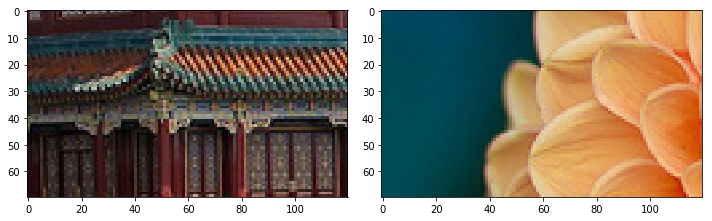

In [5]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(china)
plt.subplot(122)
plt.imshow(flower)
plt.tight_layout()
plt.show()

- the vertical and horizontal filter on example images

In [6]:
# Create 2 filters
filters = np.zeros(shape=(3, 3, channels, 2), dtype=np.float32)
filters[:, 1, :, 0] = 1  # vertical line
filters[1, :, :, 1] = 1  # horizontal line

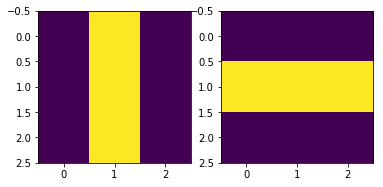

In [7]:
plt.subplot(121)
plt.imshow(filters[:, :, 0, 0])
plt.subplot(122)
plt.imshow(filters[:, :, 0, 1])
plt.show()

In [8]:
# We will want our image to be NCHW format for pytorch to process
images  = np.transpose(images, (0, 3, 1, 2)) # NHWC -> NCHW
filters = np.transpose(filters, (3, 2, 0, 1)) # HWCN -> NCHW

In [16]:
F.conv2d?

Docstring:
conv2d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1) -> Tensor

Applies a 2D convolution over an input image composed of several input
planes.

See :class:`~torch.nn.Conv2d` for details and output shape.

.. include:: cudnn_deterministic.rst

Args:
    input: input tensor of shape :math:`(\text{minibatch} \times \text{in\_channels} \times iH \times iW)`
    weight: filters of shape :math:`(\text{out\_channels} \times \frac{\text{in\_channels}}{\text{groups}} \times kH \times kW)`
    bias: optional bias tensor of shape :math:`(\text{out\_channels})`. Default: ``None``
    stride: the stride of the convolving kernel. Can be a single number or a
      tuple `(sH, sW)`. Default: 1
    padding: implicit zero paddings on both sides of the input. Can be a
      single number or a tuple `(padH, padW)`. Default: 0
    dilation: the spacing between kernel elements. Can be a single number or
      a tuple `(dH, dW)`. Default: 1
    groups: split input into group

In [9]:
images_tensor  = torch.Tensor(images)
filters_tensor = torch.Tensor(filters)
outputs = F.conv2d(images_tensor, filters_tensor, )

In [10]:
china_convolved = outputs[0].numpy()
flower_convolved = outputs[1].numpy()

In [11]:
# CHW -> HWC
china_convolved = np.transpose(china_convolved, (1, 2, 0))
flower_convolved = np.transpose(flower_convolved, (1, 2, 0))

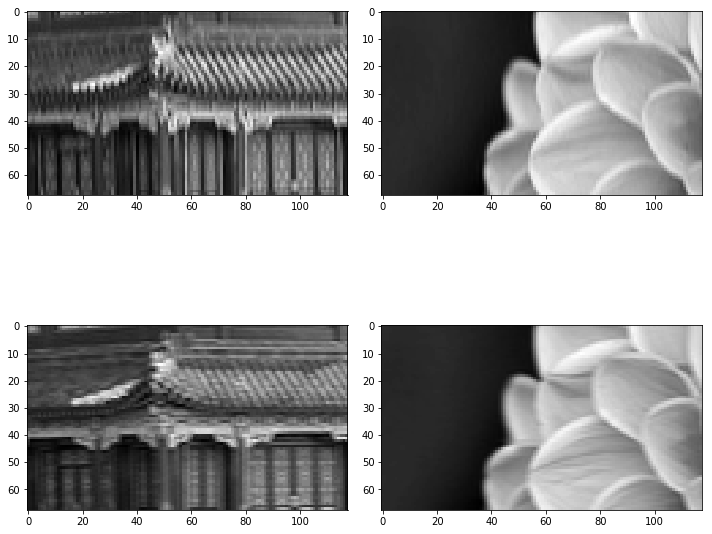

In [28]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(china_convolved[:, :, 0], cmap='gray')
plt.subplot(223)
plt.imshow(china_convolved[:, :, 1], cmap='gray')
plt.subplot(222)
plt.imshow(flower_convolved[:, :, 0], cmap='gray')
plt.subplot(224)
plt.imshow(flower_convolved[:, :, 1], cmap='gray')
plt.tight_layout()
plt.show()

- Smooth (Gaussian filter) or Emboss or Shapen Effect on example images

In [12]:
# Create 3 filters
filters2 = np.zeros(shape=(3, 3, channels, 3), dtype=np.float32)
# Smooth
filters2[0, 0, :, 0] = 0.0625
filters2[2, 0, :, 0] = 0.0625
filters2[0, 2, :, 0] = 0.0625
filters2[2, 2, :, 0] = 0.0625
filters2[0, 1, :, 0] = 0.125
filters2[1, 0, :, 0] = 0.125
filters2[1, 2, :, 0] = 0.125
filters2[2, 1, :, 0] = 0.125
filters2[1, 1, :, 0] = 0.25
# Emboss
filters2[0, 0, :, 1] = -2
filters2[2, 2, :, 1] = 2
filters2[0, 1, :, 1] = -1
filters2[1, 0, :, 1] = -1
filters2[1, 2, :, 1] = 1
filters2[2, 1, :, 1] = 1
filters2[1, 1, :, 1] = 1
# Sharpen
filters2[0, 1, :, 2] = -1
filters2[1, 0, :, 2] = -1
filters2[1, 2, :, 2] = -1
filters2[2, 1, :, 2] = -1
filters2[1, 1, :, 2] = 5

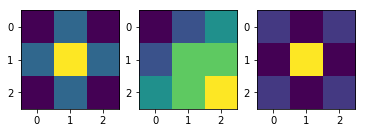

In [13]:
plt.subplot(131)
plt.imshow(filters2[:, :, 0, 0])
plt.subplot(132)
plt.imshow(filters2[:, :, 0, 1])
plt.subplot(133)
plt.imshow(filters2[:, :, 0, 2])
plt.show()

In [14]:
filters2 = np.transpose(filters2, (3, 2, 0, 1)) # HWCN -> NCHW
# comvert into Tensor
filters2_tensor = torch.Tensor(filters2)
outputs2 = F.conv2d(images_tensor, filters2_tensor, )

In [15]:
china_convolved2  = outputs2[0].numpy()
flower_convolved2 = outputs2[1].numpy()
# CHW -> HWC
china_convolved2  = np.transpose(china_convolved2, (1, 2, 0))
flower_convolved2 = np.transpose(flower_convolved2, (1, 2, 0))

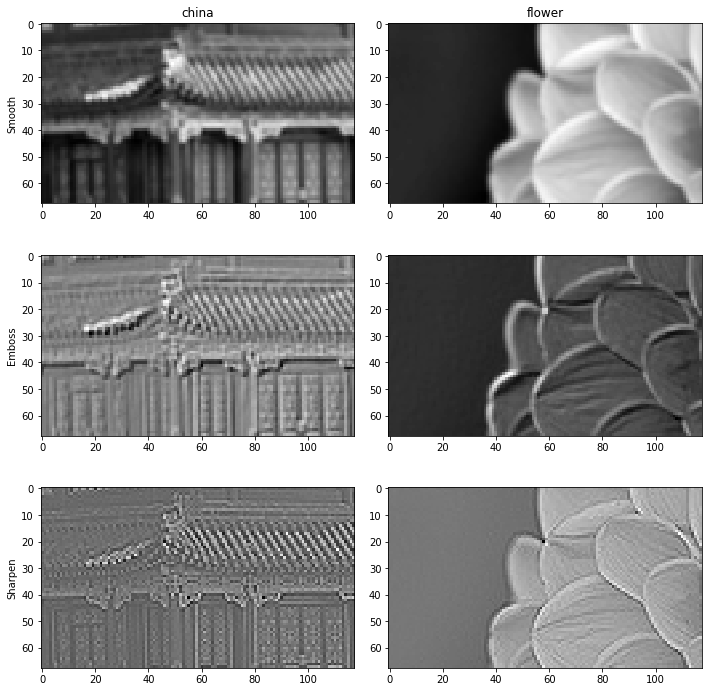

In [37]:
plt.figure(figsize=(10, 10))
plt.subplot(321)
plt.imshow(china_convolved2[:, :, 0], cmap='gray')
plt.title("china")
plt.ylabel("Smooth")
plt.subplot(323)
plt.imshow(china_convolved2[:, :, 1], cmap='gray')
plt.ylabel("Emboss")
plt.subplot(325)
plt.imshow(china_convolved2[:, :, 2], cmap='gray')
plt.ylabel("Sharpen")
plt.subplot(322)
plt.imshow(flower_convolved2[:, :, 0], cmap='gray')
plt.title("flower")
plt.subplot(324)
plt.imshow(flower_convolved2[:, :, 1], cmap='gray')
plt.subplot(326)
plt.imshow(flower_convolved2[:, :, 2], cmap='gray')
plt.tight_layout()
plt.show()

- Sobel for edge detection

> 一个离散的一阶差分算子，用来计算图像亮度函数的一阶梯度之近似值。在图像的任何一点使用此算子，将会产生该点对应的梯度矢量或是其法矢量。

In [16]:
# Create 4 filters
filters3 = np.zeros(shape=(3, 3, channels, 4), dtype=np.float32)
# Top
filters3[0, 0, :, 0] = 1
filters3[0, 1, :, 0] = 2
filters3[0, 2, :, 0] = 1
filters3[2, 0, :, 0] = -1
filters3[2, 1, :, 0] = -2
filters3[2, 2, :, 0] = -1
# Left
filters3[0, 0, :, 1] = 1
filters3[1, 0, :, 1] = 2
filters3[2, 0, :, 1] = 1
filters3[0, 2, :, 1] = -1
filters3[1, 2, :, 1] = -2
filters3[2, 2, :, 1] = -1
# Bottom
filters3[0, 0, :, 2] = -1
filters3[0, 1, :, 2] = -2
filters3[0, 2, :, 2] = -1
filters3[2, 0, :, 2] = 1
filters3[2, 1, :, 2] = 2
filters3[2, 2, :, 2] = 1
# Right
filters3[0, 0, :, 3] = -1
filters3[1, 0, :, 3] = -2
filters3[2, 0, :, 3] = -1
filters3[0, 2, :, 3] = 1
filters3[1, 2, :, 3] = 2
filters3[2, 2, :, 3] = 1

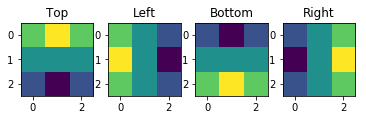

In [17]:
plt.subplot(141)
plt.imshow(filters3[:, :, 0, 0])
plt.title("Top")
plt.subplot(142)
plt.imshow(filters3[:, :, 0, 1])
plt.title("Left")
plt.subplot(143)
plt.imshow(filters3[:, :, 0, 2])
plt.title("Bottom")
plt.subplot(144)
plt.imshow(filters3[:, :, 0, 3])
plt.title("Right")
plt.show()

In [18]:
filters3 = np.transpose(filters3, (3, 2, 0, 1)) # HWCN -> NCHW
# comvert into Tensor
filters3_tensor = torch.Tensor(filters3)
outputs3 = F.conv2d(images_tensor, filters3_tensor, )

In [19]:
china_convolved3  = outputs3[0].numpy()
flower_convolved3 = outputs3[1].numpy()
# CHW -> HWC
china_convolved3  = np.transpose(china_convolved3, (1, 2, 0))
flower_convolved3 = np.transpose(flower_convolved3, (1, 2, 0))

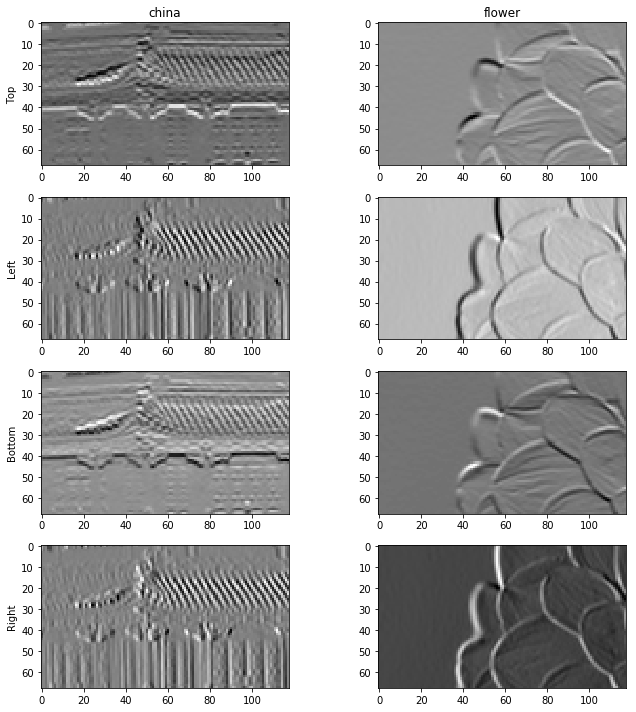

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(421)
plt.imshow(china_convolved3[:, :, 0], cmap='gray')
plt.title("china")
plt.ylabel("Top")
plt.subplot(423)
plt.imshow(china_convolved3[:, :, 1], cmap='gray')
plt.ylabel("Left")
plt.subplot(425)
plt.imshow(china_convolved3[:, :, 2], cmap='gray')
plt.ylabel("Bottom")
plt.subplot(427)
plt.imshow(china_convolved3[:, :, 3], cmap='gray')
plt.ylabel("Right")

plt.subplot(422)
plt.imshow(flower_convolved3[:, :, 0], cmap='gray')
plt.title("flower")
plt.subplot(424)
plt.imshow(flower_convolved3[:, :, 1], cmap='gray')
plt.subplot(426)
plt.imshow(flower_convolved3[:, :, 2], cmap='gray')
plt.subplot(428)
plt.imshow(flower_convolved3[:, :, 3], cmap='gray')
plt.tight_layout()
plt.show()

还可以使用 OpenCV 进行实现多种滤波器 

To be continued

## Cifar10 classification 

### PyTorch Basic Implementation 

#### 导入环境 

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms

In [17]:
transforms.Normalize?

Init signature: transforms.Normalize(mean, std, inplace=False)
Docstring:     
Normalize a tensor image with mean and standard deviation.
Given mean: ``(M1,...,Mn)`` and std: ``(S1,..,Sn)`` for ``n`` channels, this transform
will normalize each channel of the input ``torch.*Tensor`` i.e.
``input[channel] = (input[channel] - mean[channel]) / std[channel]``

.. note::
    This transform acts out of place, i.e., it does not mutates the input tensor.

Args:
    mean (sequence): Sequence of means for each channel.
    std (sequence): Sequence of standard deviations for each channel.
File:           c:\users\hyj\anaconda3\envs\py37fastai10\lib\site-packages\torchvision\transforms\transforms.py
Type:           type
Subclasses:     


#### 加载数据

In [22]:
# 定义一个基础图像变换
# 由于torchvision的datasets的输出是[0,1]的PILImage
# 所以我们先先归一化为[-1,1]的Tensor
# 利用transforms模块中的Compose()
# 把ToTensor和Normalize这两个变换组合起来
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

`batch_size` 可以适当进行调整

源码解读：[SOURCE CODE FOR TORCHVISION.DATASETS.CIFAR](https://pytorch.org/docs/stable/_modules/torchvision/datasets/cifar.html)

- `class CIFAR10(VisionDataset)` 继承了 `VisionDataset` 这一个类
- `def __init__(self, root, train=True, transform=None, target_transform=None, download=False)` 定义基础的输入参数和默认值，`train` 这个字段说明下载对应 `train/test` 部分的数据集数据
- `class CIFAR100(CIFAR10)` 直接继承了 `CIFAR10` 方法，不过修改了部分数据集内容地址

In [110]:
# training set
trainset    = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
# testing set
testset     = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader  = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [8]:
# iter?
# 生成迭代器
# lst = [1, 2, 3]
# for i in iter(lst):
#     print(i)

#### 数据显示 

In [64]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [65]:
label_show = labels.numpy()
images_show = images / 2 + 0.5
images_show = images_show.numpy()
print(type(images_show))
print(images_show.shape)

<class 'numpy.ndarray'>
(4, 3, 32, 32)


In [66]:
a = images_show[2,:,:,:]
images_show[2,:,:,:].shape

(3, 32, 32)

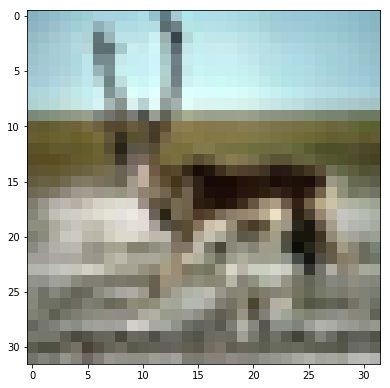

In [67]:
testttt = np.transpose(a, (1, 2, 0))
plt.imshow(testttt)
plt.show()

<https://www.stefanfiott.com/machine-learning/cifar-10-classifier-using-cnn-in-pytorch/> 此处图像显示方法近似

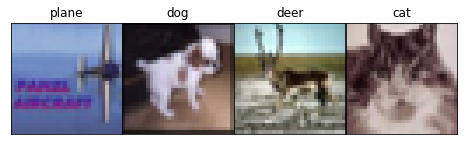

In [68]:
fig, axs = plt.subplots(1,4)
# 取消间距
fig.subplots_adjust(hspace = .5, wspace=.001)

for i in range(4):
    # PyTorch CWH -> WHC
    img = images_show[i,:,:,:]
    axs[i].imshow(np.transpose(img, (1, 2, 0)))
    # axs[i].title(classes[labels[i]])
    axs[i].set_title(classes[labels[i]])
    # 取消坐标轴
    axs[i].set_xticks([])
    axs[i].set_yticks([])

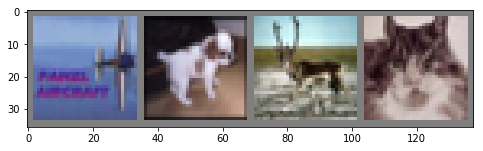

plane   dog  deer   cat


In [69]:
# 官方tutorial
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    # PyTorch CWH -> WHC
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [73]:
nn.Conv2d?

Init signature:
nn.Conv2d(
    in_channels,
    out_channels,
    kernel_size,
    stride=1,
    padding=0,
    dilation=1,
    groups=1,
    bias=True,
)
Docstring:     
Applies a 2D convolution over an input signal composed of several input
planes.

In the simplest case, the output value of the layer with input size
:math:`(N, C_{\text{in}}, H, W)` and output :math:`(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})`
can be precisely described as:

.. math::
    \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
    \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)


where :math:`\star` is the valid 2D `cross-correlation`_ operator,
:math:`N` is a batch size, :math:`C` denotes a number of channels,
:math:`H` is a height of input planes in pixels, and :math:`W` is
width in pixels.

* :attr:`stride` controls the stride for the cross-correlation, a single
  number or a tuple.

* :attr:`padding` controls the amount of implici

In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


#### 构建网络 

In [71]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 输入通道3，输出通道6，核5
        # 32*32*3 可以替换成两个卷积核为3
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 28*28*6
        self.pool = nn.MaxPool2d(2, 2)
        # 14*14*6
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 10*10*16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 32*32*3 -> 28*28*6 -> 14*14*6
        x = self.pool(F.relu(self.conv1(x)))
        # 14*14*6 -> 10*10*16 -> 5*5*16
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# net = CNN()
net = CNN().to(device)

In [72]:
net

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

例子中的非线性激活函数用的并不是 `torch.nn` 模块中的这个部分，但是 `torch.nn` 模块中有这个部分

激活函数用的是 `torch.nn.functional` 模块中的函数

- `torch.nn` 与 `torch.nn.functional`的区别

torch.nn中大多数layer在torch.nn.funtional中都有一个与之对应的函数。二者的区别在于：

torch.nn.Module中实现layer的都是一个特殊的类，可以去查阅，他们都是以class xxxx来定义的，会自动提取可学习的参数。

而 `nn.functional` 中的函数，更像是纯函数，由 `def function( )` 定义，只是进行简单的数学运算而已，functional中的函数是一个确定的不变的运算公式，输入数据产生输出；

而深度学习中会有很多权重是在不断更新的，不可能每进行一次forward就用新的权重重新来定义一遍函数来进行计算，所以说就会采用类的方式，以确保能在参数发生变化时仍能使用我们之前定好的运算步骤。

如果模型有可学习的参数，最好使用nn.Module对应的相关layer，否则二者都可以使用，没有什么区别。
比如此例中的Relu其实没有可学习的参数，只是进行一个运算而已，所以使用的就是functional中的relu函数，

而卷积层和全连接层都有**可学习的参数**，所以用的是 `nn.Module` 中的类。
不具备可学习参数的层，将它们用函数代替，这样可以不用放在构造函数中进行初始化。

定义网络模型，主要会用到的就是torch.nn 和torch.nn.funtional这两个模块

#### 定义Loss以及optimizer

In [73]:
import torch.optim as optim          #导入torch.potim模块
 
# 交叉熵损失函数
criterion = nn.CrossEntropyLoss()    
# optim模块中的SGD梯度优化方式---随机梯度下降
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

https://blog.csdn.net/teeyohuang/article/details/79219368

In [74]:
import time
start = time.time()
for _ in range(100000000):
    pass
end = time.time()
print("循环运行时间:%.2f秒"%(end-start))
#output:循环运行时间:5.50秒

循环运行时间:4.04秒


#### 开始训练

In [75]:
import time
# from tqdm import tqdm_notebook

# for epoch in tqdm_notebook(range(5)):
for epoch in range(5):  # loop over the dataset multiple times
    
    start = time.time()

    running_loss = 0.0
    # enumerate是python的内置函数，既获得索引也获得数据
    for i, data in enumerate(trainloader, 0):
        
        # data是从enumerate返回的data，包含数据和标签信息，分别赋值给inputs和labels
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 要把梯度重新归零，因为反向传播过程中梯度会累加上一次循环的梯度
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # 使用交叉熵，计算损失值criterion
        loss = criterion(outputs, labels)
        # 反向传播
        loss.backward()
        # 当执行反向传播之后，把优化器的参数进行更新，以便进行下一轮
        optimizer.step()
`
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    end = time.time()
    print("循环运行时间:%.2f秒"%(end-start))

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 1.830
[1,  6000] loss: 1.662
[1,  8000] loss: 1.594
[1, 10000] loss: 1.544
[1, 12000] loss: 1.470
循环运行时间:110.99秒
[2,  2000] loss: 1.431
[2,  4000] loss: 1.373
[2,  6000] loss: 1.355
[2,  8000] loss: 1.335
[2, 10000] loss: 1.310
[2, 12000] loss: 1.288
循环运行时间:112.98秒
[3,  2000] loss: 1.224
[3,  4000] loss: 1.210
[3,  6000] loss: 1.232
[3,  8000] loss: 1.206
[3, 10000] loss: 1.190
[3, 12000] loss: 1.191
循环运行时间:110.55秒
[4,  2000] loss: 1.126
[4,  4000] loss: 1.106
[4,  6000] loss: 1.122
[4,  8000] loss: 1.108
[4, 10000] loss: 1.125
[4, 12000] loss: 1.136
循环运行时间:110.73秒
[5,  2000] loss: 1.025
[5,  4000] loss: 1.072
[5,  6000] loss: 1.061
[5,  8000] loss: 1.055
[5, 10000] loss: 1.044
[5, 12000] loss: 1.068
循环运行时间:111.55秒
Finished Training


#### 网络保存与重载 

In [76]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [77]:
# test
test_dataiter = iter(testloader)
test_images, test_labels = test_dataiter.next()
test_images = test_images.to(device)
test_labels = test_labels.to(device)

In [78]:
net = CNN()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

#### 效果验证 

In [79]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [92]:
import pandas as pd

def accuracy(predicted,target):
    correct = 0
    #left = np.array(np.argmax(predicted,axis=0)).flatten()
    #right = np.argmax(target,axis=1)
    #confusion_mat = np.zeros((len(np.unique(target)),len(np.unique(predicted))))
    # 因为采用batch，所以 np.unique(target) 无法出现所有类别
    confusion_mat = np.zeros((10,10))
    for i in range(len(target)):
        if(predicted[i] == target[i]):
            correct+=1
        confusion_mat[target[i]][predicted[i]] = confusion_mat[target[i]][predicted[i]] +1
    return correct/len(target),pd.DataFrame(np.matrix(confusion_mat,dtype="int32"))

In [93]:
# 增加confusion map
conf_mat = np.zeros((10,10))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        # 增加confusion map
        _, map_old = accuracy(predicted.numpy(),labels.numpy())
        conf_mat = map_old + conf_mat
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 73 %
Accuracy of  bird : 53 %
Accuracy of   cat : 49 %
Accuracy of  deer : 49 %
Accuracy of   dog : 41 %
Accuracy of  frog : 69 %
Accuracy of horse : 66 %
Accuracy of  ship : 83 %
Accuracy of truck : 60 %


In [94]:
conf_mat

,0,1,2,3,4,5,6,7,8,9
0,512.0,34.0,93.0,34.0,30.0,5.0,15.0,11.0,239.0,27.0
1,19.0,739.0,8.0,10.0,10.0,2.0,16.0,8.0,92.0,96.0
2,50.0,5.0,539.0,111.0,71.0,58.0,58.0,39.0,56.0,13.0
3,16.0,10.0,83.0,493.0,59.0,138.0,83.0,47.0,56.0,15.0
4,20.0,4.0,113.0,108.0,491.0,34.0,81.0,100.0,43.0,6.0
5,10.0,4.0,92.0,302.0,46.0,410.0,34.0,68.0,26.0,8.0
6,4.0,7.0,77.0,91.0,64.0,20.0,695.0,10.0,22.0,10.0
7,8.0,5.0,48.0,82.0,73.0,67.0,17.0,660.0,13.0,27.0
8,45.0,41.0,12.0,19.0,12.0,2.0,5.0,6.0,833.0,25.0
9,40.0,124.0,12.0,42.0,9.0,3.0,22.0,29.0,117.0,602.0


#### 混淆矩阵可视化 

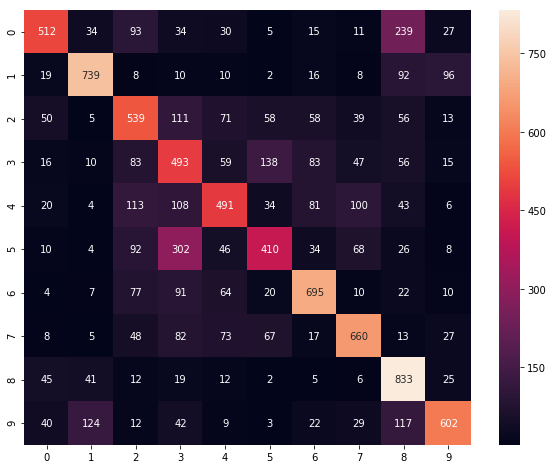

In [107]:
import seaborn as sns
from IPython.core.pylabtools import figsize # import figsize
figsize(10, 8) # 设置 figsize
# 参看format格式
ax = sns.heatmap(conf_mat, annot=True, fmt='1.0f')

### PyTorch Implementation with validation

modified from <https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb>

#### 相关函数定义 

In [16]:
def plot_images(images, cls_true, cls_pred=None):
    """
    Adapted from https://github.com/Hvass-Labs/TensorFlow-Tutorials/
    """
    fig, axes = plt.subplots(3, 3)

    for i, ax in enumerate(axes.flat):
        # plot img
        ax.imshow(images[i, :, :, :], interpolation='spline16')

        # show true & predicted classes
        cls_true_name = label_names[cls_true[i]]
        if cls_pred is None:
            xlabel = "{0} ({1})".format(cls_true_name, cls_true[i])
        else:
            cls_pred_name = label_names[cls_pred[i]]
            xlabel = "True: {0}\nPred: {1}".format(
                cls_true_name, cls_pred_name
            )
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

In [23]:
def get_train_valid_loader(data_dir,batch_size,augment,random_seed,valid_size=0.1,
                           shuffle=True,show_sample=False,num_workers=4,pin_memory=False):
    """
    Params
    ------
    - data_dir: path directory to the dataset.
    - batch_size: how many samples per batch to load.
    - augment: whether to apply the data augmentation scheme
      mentioned in the paper. Only applied on the train split.
    - random_seed: fix seed for reproducibility.
    - valid_size: percentage split of the training set used for
      the validation set. Should be a float in the range [0, 1].
    - shuffle: whether to shuffle the train/validation indices.
    - show_sample: plot 9x9 sample grid of the dataset.
    - num_workers: number of subprocesses to use when loading the dataset.
    - pin_memory: whether to copy tensors into CUDA pinned memory. Set it to
      True if using GPU.
    Returns
    -------
    - train_loader: training set iterator.
    - valid_loader: validation set iterator.
    """
    error_msg = "[!] valid_size should be in the range [0, 1]."
    assert ((valid_size >= 0) and (valid_size <= 1)), error_msg

    #normalize = transforms.Normalize(
    #    mean=[0.4914, 0.4822, 0.4465],
    #    std=[0.2023, 0.1994, 0.2010],
    #)
    normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 

    # define transforms
    valid_transform = transforms.Compose([
            transforms.ToTensor(),
            normalize,
    ])
    if augment:
        train_transform = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ])
    else:
        train_transform = transforms.Compose([
            transforms.ToTensor(),
            normalize,
        ])

    # load the dataset
    train_dataset = torchvision.datasets.CIFAR10(
        root=data_dir, train=True,
        download=True, transform=train_transform,
    )

    valid_dataset = torchvision.datasets.CIFAR10(
        root=data_dir, train=True,
        download=True, transform=valid_transform,
    )

    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, sampler=train_sampler,
        num_workers=num_workers, pin_memory=pin_memory,
    )
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=batch_size, sampler=valid_sampler,
        num_workers=num_workers, pin_memory=pin_memory,
    )

    # visualize some images
    if show_sample:
        sample_loader = torch.utils.data.DataLoader(
            train_dataset, batch_size=9, shuffle=shuffle,
            num_workers=num_workers, pin_memory=pin_memory,
        )
        data_iter = iter(sample_loader)
        images, labels = data_iter.next()
        X = images.numpy().transpose([0, 2, 3, 1])
        plot_images(X, labels)

    return (train_loader, valid_loader)

In [43]:
import pandas as pd

def show_train_loss(log_training_loss):
    df = pd.DataFrame(log_training_loss)
    ax = df.plot(figsize=(8,4))
    ax.ticklabel_format(useOffset=False)
    plt.title('loss along with batch')
    plt.show(ax)

In [82]:
import pandas as pd

def show_train_process(log, title):
    df = pd.DataFrame(log)
    ax = df.plot(figsize=(8,4))
    ax.ticklabel_format(useOffset=False)
    plt.title(title)
    plt.show(ax)

In [53]:
def accuracy(predicted,target):
    correct = 0
    #left = np.array(np.argmax(predicted,axis=0)).flatten()
    #right = np.argmax(target,axis=1)
    #confusion_mat = np.zeros((len(np.unique(target)),len(np.unique(predicted))))
    # 因为采用batch，所以 np.unique(target) 无法出现所有类别
    confusion_mat = np.zeros((10,10))
    for i in range(len(target)):
        if(predicted[i] == target[i]):
            correct+=1
        confusion_mat[target[i]][predicted[i]] = confusion_mat[target[i]][predicted[i]] +1
    return correct/len(target),pd.DataFrame(np.matrix(confusion_mat,dtype="int32"))

In [54]:
import seaborn as sns
from IPython.core.pylabtools import figsize # import figsize

def plot_conf_mat(conf_mat):
    figsize(10, 8) # 设置 figsize
    # 参看format格式
    ax = sns.heatmap(conf_mat, annot=True, fmt='1.0f')

#### 划分验证集

In [139]:
(train_loader, valid_loader) = get_train_valid_loader(data_dir='./data',batch_size=4,augment=True,random_seed=100,valid_size=0.1)

Files already downloaded and verified
Files already downloaded and verified


In [140]:
# testing set
testset     = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader  = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [56]:
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [141]:
print("train_loader: {}, valid_loader: {}, testloader: {}".format(len(train_loader), len(valid_loader), len(testloader)))

train_loader: 11250, valid_loader: 1250, testloader: 2500


#### 构建网络

In [125]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [145]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 输入通道3，输出通道6，核5
        # 32*32*3 可以替换成两个卷积核为3
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 28*28*6
        self.pool = nn.MaxPool2d(2, 2)
        # 14*14*6
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 10*10*16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 32*32*3 -> 28*28*6 -> 14*14*6
        x = self.pool(F.relu(self.conv1(x)))
        # 14*14*6 -> 10*10*16 -> 5*5*16
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# net = CNN()
net = CNN().to(device)

In [146]:
import torch.optim as optim          #导入torch.potim模块
 
# 交叉熵损失函数
criterion = nn.CrossEntropyLoss()    
# optim模块中的SGD梯度优化方式---随机梯度下降
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 开始训练

In [147]:
import time

log_training_loss =[]

for epoch in range(5):  # loop over the dataset multiple times
    
    start = time.time()

    running_loss = 0.0
    # enumerate是python的内置函数，既获得索引也获得数据
    for i, data in enumerate(train_loader, 0):
        
        # data是从enumerate返回的data，包含数据和标签信息，分别赋值给inputs和labels
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 要把梯度重新归零，因为反向传播过程中梯度会累加上一次循环的梯度
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # 使用交叉熵，计算损失值criterion
        loss = criterion(outputs, labels)
        
        # record loss
        log_training_loss.append(loss.cpu().detach().numpy())
        
        # 反向传播
        loss.backward()
        # 当执行反向传播之后，把优化器的参数进行更新，以便进行下一轮
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    # test on validtion set
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for data_valid in valid_loader:
            images_valid, labels_valid = data_valid
            images_valid = images_valid.to(device)
            labels_valid = labels_valid.to(device)
            
            outputs_valid = net(images_valid)
            _, predicted_valid = torch.max(outputs_valid.data, 1)
            total_valid += labels_valid.size(0)
            correct_valid += (predicted_valid == labels_valid).sum().item()
    print('Accuracy of the network on the valid images: %d %%' % (
    100 * correct_valid / total_valid))

    # print time of one loop
    end = time.time()
    print("循环运行时间:%.2f秒"%(end-start))

print('Finished Training')

[1,  2000] loss: 2.206
[1,  4000] loss: 1.854
[1,  6000] loss: 1.662
[1,  8000] loss: 1.582
[1, 10000] loss: 1.497
[1, 12000] loss: 1.482
Accuracy of the network on the valid images: 39 %
循环运行时间:123.60秒
[2,  2000] loss: 1.390
[2,  4000] loss: 1.387
[2,  6000] loss: 1.346
[2,  8000] loss: 1.330
[2, 10000] loss: 1.312
[2, 12000] loss: 1.283
Accuracy of the network on the valid images: 46 %
循环运行时间:124.76秒
[3,  2000] loss: 1.228
[3,  4000] loss: 1.229
[3,  6000] loss: 1.214
[3,  8000] loss: 1.191
[3, 10000] loss: 1.174
[3, 12000] loss: 1.185
Accuracy of the network on the valid images: 48 %
循环运行时间:125.77秒
[4,  2000] loss: 1.107
[4,  4000] loss: 1.114
[4,  6000] loss: 1.101
[4,  8000] loss: 1.112
[4, 10000] loss: 1.100
[4, 12000] loss: 1.103
Accuracy of the network on the valid images: 50 %
循环运行时间:124.51秒
[5,  2000] loss: 1.032
[5,  4000] loss: 1.029
[5,  6000] loss: 1.035
[5,  8000] loss: 1.027
[5, 10000] loss: 1.025
[5, 12000] loss: 1.046
Accuracy of the network on the valid images: 54 %


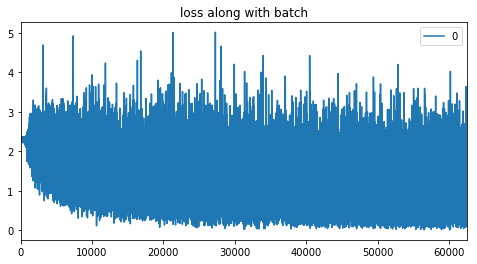

In [148]:
show_train_loss(log_training_loss)

#### 调大batch重新训练

In [65]:
batch_size = 50

In [66]:
# 所以我们先先归一化为[-1,1]的Tensor
# 利用transforms模块中的Compose()
# 把ToTensor和Normalize这两个变换组合起来
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

In [67]:
(train_loader, valid_loader) = get_train_valid_loader(data_dir='./data',batch_size=batch_size,augment=True,random_seed=100,valid_size=0.1)
testset     = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
print("train_loader: {}, valid_loader: {}, test_loader: {}".format(len(train_loader), len(valid_loader), len(test_loader)))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train_loader: 900, valid_loader: 100, test_loader: 200


In [68]:
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [69]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [73]:
import torch.optim as optim          #导入torch.potim模块

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 输入通道3，输出通道6，核5
        # 32*32*3 可以替换成两个卷积核为3
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 28*28*6
        self.pool = nn.MaxPool2d(2, 2)
        # 14*14*6
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 10*10*16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 32*32*3 -> 28*28*6 -> 14*14*6
        x = self.pool(F.relu(self.conv1(x)))
        # 14*14*6 -> 10*10*16 -> 5*5*16
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# net = CNN()
net2 = CNN().to(device)
 
# 交叉熵损失函数
criterion = nn.CrossEntropyLoss()    
# optim模块中的SGD梯度优化方式---随机梯度下降
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

In [74]:
log_training_loss =[]
log_val_acc =[]

for epoch in range(50):  # loop over the dataset multiple times
    
    start = time.time()

    running_loss = 0.0
    # enumerate是python的内置函数，既获得索引也获得数据
    for i, data in enumerate(train_loader, 0):
        
        # data是从enumerate返回的data，包含数据和标签信息，分别赋值给inputs和labels
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 要把梯度重新归零，因为反向传播过程中梯度会累加上一次循环的梯度
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        # 使用交叉熵，计算损失值criterion
        loss = criterion(outputs, labels)
        
        # record loss
        log_training_loss.append(loss.cpu().detach().numpy())
        
        # 反向传播
        loss.backward()
        # 当执行反向传播之后，把优化器的参数进行更新，以便进行下一轮
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        # 把batch调整为64
        if i % 450 == 449:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    # test on validtion set
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for data_valid in valid_loader:
            images_valid, labels_valid = data_valid
            images_valid = images_valid.to(device)
            labels_valid = labels_valid.to(device)
            
            outputs_valid = net2(images_valid)
            _, predicted_valid = torch.max(outputs_valid.data, 1)
            total_valid += labels_valid.size(0)
            correct_valid += (predicted_valid == labels_valid).sum().item()
    val_acc = correct_valid / total_valid
    #print('Accuracy of the network on the valid images: %d %%' % (
    print('Validation Accuracy : %d %%' % (100 * val_acc))
    log_val_acc.append(val_acc)

    # print time of one loop
    end = time.time()
    print("循环运行时间:%.2f秒"%(end-start))

print('Finished Training')

[1,   450] loss: 0.518
[1,   900] loss: 0.517
Validation Accuracy : 14 %
循环运行时间:27.78秒
[2,   450] loss: 0.510
[2,   900] loss: 0.479
Validation Accuracy : 23 %
循环运行时间:27.85秒
[3,   450] loss: 0.453
[3,   900] loss: 0.440
Validation Accuracy : 31 %
循环运行时间:28.77秒
[4,   450] loss: 0.422
[4,   900] loss: 0.405
Validation Accuracy : 36 %
循环运行时间:28.59秒
[5,   450] loss: 0.391
[5,   900] loss: 0.383
Validation Accuracy : 40 %
循环运行时间:28.35秒
[6,   450] loss: 0.376
[6,   900] loss: 0.371
Validation Accuracy : 42 %
循环运行时间:28.26秒
[7,   450] loss: 0.364
[7,   900] loss: 0.361
Validation Accuracy : 44 %
循环运行时间:28.20秒
[8,   450] loss: 0.354
[8,   900] loss: 0.351
Validation Accuracy : 45 %
循环运行时间:28.31秒
[9,   450] loss: 0.347
[9,   900] loss: 0.341
Validation Accuracy : 47 %
循环运行时间:27.65秒
[10,   450] loss: 0.335
[10,   900] loss: 0.336
Validation Accuracy : 49 %
循环运行时间:27.50秒
[11,   450] loss: 0.332
[11,   900] loss: 0.325
Validation Accuracy : 51 %
循环运行时间:27.48秒
[12,   450] loss: 0.322
[12,   900] los

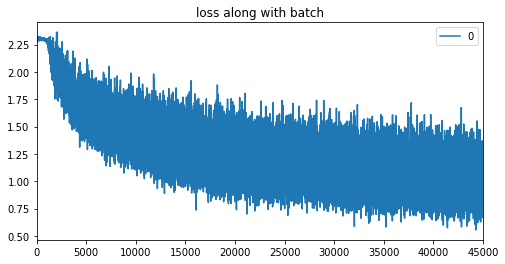

In [76]:
show_train_loss(log_training_loss)

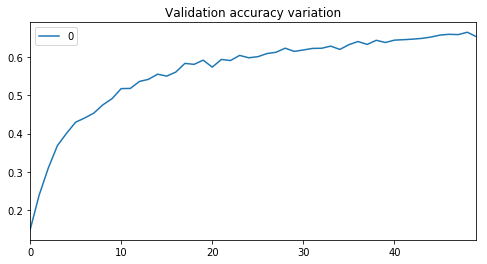

In [83]:
#show_train_process(log_training_loss, 'Loss variation')
show_train_process(log_val_acc, 'Validation accuracy variation')

In [84]:
PATH = './cifar_net_batch50.pth'
torch.save(net2.state_dict(), PATH)

In [85]:
net2 = CNN()
net2.load_state_dict(torch.load(PATH))

In [86]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 65 %


In [87]:
# 增加confusion map
conf_mat = np.zeros((10,10))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        # 增加confusion map
        _, map_old = accuracy(predicted.numpy(),labels.numpy())
        conf_mat = map_old + conf_mat
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 78 %
Accuracy of   car : 82 %
Accuracy of  bird : 51 %
Accuracy of   cat : 40 %
Accuracy of  deer : 56 %
Accuracy of   dog : 63 %
Accuracy of  frog : 65 %
Accuracy of horse : 75 %
Accuracy of  ship : 79 %
Accuracy of truck : 59 %


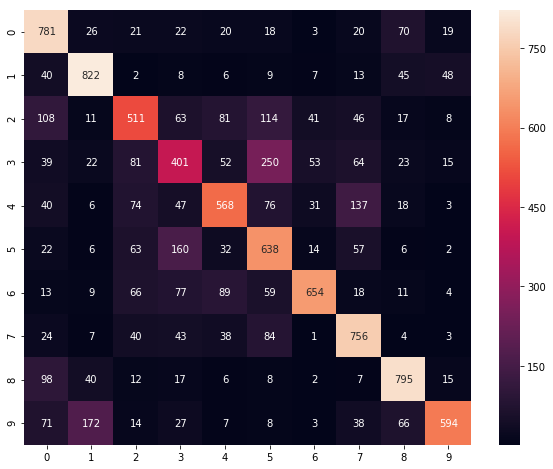

In [88]:
plot_conf_mat(conf_mat)

'plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck'

### Fastai Implementation  

#### 官方教程 

https://www.kaggle.com/c/cifar-10/data

#### custom NN 

- https://github.com/radekosmulski/whale/blob/master/siamese_network_prototype.ipynb
- http://afitts.github.io/2018/12/03/humpback-siamese/

from [FastAI is too abstracted… how to create custom networks?](https://forums.fast.ai/t/fastai-is-too-abstracted-how-to-create-custom-networks/42040/3)

In [144]:
from fastai import *
from fastai.vision import *
from fastai.vision import learner
from fastai.callbacks.hooks import num_features_model, model_sizes

class SiameseNetwork(nn.Module):
    def __init__(self, arch=models.resnet18):
        super().__init__() 
        self.cnn = create_body(arch)
        self.head = nn.Linear(num_features_model(self.cnn), 1)
        
    def forward(self, im_A, im_B):
        # dl - distance layer
        x1, x2 = F.seq(im_A, im_B).map(self.cnn).map(self.process_features)
        dl = self.calculate_distance(x1, x2)
        out = self.head(dl)
        return out
    
    def process_features(self, x): return x.reshape(*x.shape[:2], -1).max(-1)[0]
    def calculate_distance(self, x1, x2): return (x1 - x2).abs_()
    
model = SiameseNet()

## 参考链接 

- kernel visualization

1. http://setosa.io/ev/image-kernels/

- tqdm库

1. https://tqdm.github.io/docs/tqdm_notebook/
2. [好玩的Python库tqdm - CSDN](https://blog.csdn.net/zejianli/article/details/77915751)
3. https://stackoverflow.com/questions/57343134/jupyter-notebooks-not-displaying-progress-bars

第一次使用
`pip install ipywidgets`

```shell
conda install ipywidgets
jupyter nbextension enable --py widgetsnbextension
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

- PyTorch Cifar10

1. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
2. https://github.com/kuangliu/pytorch-cifar
3. https://blog.csdn.net/teeyohuang/article/details/79211798
4. https://www.stefanfiott.com/machine-learning/cifar-10-classifier-using-cnn-in-pytorch/

- matplotlib

1. python subplot within a loop: https://stackoverflow.com/questions/17210646/python-subplot-within-a-loop-first-panel-appears-in-wrong-position